<a href="https://colab.research.google.com/github/samueljos3/ProjetoHeartDisease/blob/main/ProjetoHeartDisease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

PERGUNTAS:
- QUAIS ASPECTOS MAIS INFLUENCIAM E MENOS INFLUENCIAM NUMA DOENÇA CARDÍACA
- QUAIS COMBOS DE AGRAVANTES MAIS INFLUENCIAM NUMA DOENÇA CARDÍACA
- COMO OS HABITOS E FATORES CONTROLÁVEIS INFLUENCIAM NUMA DOENÇA CARDÍACA
- COMO A RAÇA E O SEXO PODE INFLUENCIAR 








# PROJ




## Importando bibliotecas e dados 

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
df = pd.read_csv("https://raw.githubusercontent.com/erlonL/Projeto-ICD/main/heart-disease.csv")
df

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,Yes,27.41,Yes,No,No,7.0,0.0,Yes,Male,60-64,Hispanic,Yes,No,Fair,6.0,Yes,No,No
319791,No,29.84,Yes,No,No,0.0,0.0,No,Male,35-39,Hispanic,No,Yes,Very good,5.0,Yes,No,No
319792,No,24.24,No,No,No,0.0,0.0,No,Female,45-49,Hispanic,No,Yes,Good,6.0,No,No,No
319793,No,32.81,No,No,No,0.0,0.0,No,Female,25-29,Hispanic,No,No,Good,12.0,No,No,No


## Tratando os dados e avaliando (parte 1)

In [ ]:
df = df.dropna() # retirando possíveis elementos NaN/Na

### Substituindo os valores em 'GenHealth' de texto para valores numéricos

In [ ]:
df['GenHealthNUM'] = df['GenHealth'].replace({"Poor": 1.0, "Fair": 2.0, "Good": 3.0, "Very good": 4.0, "Excellent": 5.0}) # criando uma nova coluna numérica baseada nos valores de GenHealth
# A nova coluna GenHealthNUM segue uma ordem de classificação, em que 1 é a pior saúde geral e 5 a melhor

### Avaliando os dados

In [ ]:
# utilizando o describe do pandas
# para extrair informações diversas sobre cada coluna do dataset
print(df.describe(include = 'all'),'\n\n')

       HeartDisease            BMI Smoking AlcoholDrinking  Stroke  \
count        319795  319795.000000  319795          319795  319795   
unique            2            NaN       2               2       2   
top              No            NaN      No              No      No   
freq         292422            NaN  187887          298018  307726   
mean            NaN      28.325399     NaN             NaN     NaN   
std             NaN       6.356100     NaN             NaN     NaN   
min             NaN      12.020000     NaN             NaN     NaN   
25%             NaN      24.030000     NaN             NaN     NaN   
50%             NaN      27.340000     NaN             NaN     NaN   
75%             NaN      31.420000     NaN             NaN     NaN   
max             NaN      94.850000     NaN             NaN     NaN   

        PhysicalHealth   MentalHealth DiffWalking     Sex AgeCategory    Race  \
count     319795.00000  319795.000000      319795  319795      319795  319795 

In [ ]:
# Avaliar a porcentagem de presença de cada elemento numa coluna
for i in df:
  counts = df[i].value_counts()
  porcentagem = counts / len(df) * 100
  print(porcentagem,'\n----------------------------------------------\n')


No     91.440454
Yes     8.559546
Name: HeartDisease, dtype: float64 
----------------------------------------------

26.63    1.176379
27.46    0.865242
27.44    0.851483
24.41    0.843040
27.12    0.789568
           ...   
59.85    0.000313
50.59    0.000313
92.53    0.000313
62.95    0.000313
46.56    0.000313
Name: BMI, Length: 3604, dtype: float64 
----------------------------------------------

No     58.752326
Yes    41.247674
Name: Smoking, dtype: float64 
----------------------------------------------

No     93.190325
Yes     6.809675
Name: AlcoholDrinking, dtype: float64 
----------------------------------------------

No     96.22602
Yes     3.77398
Name: Stroke, dtype: float64 
----------------------------------------------

0.0     70.854454
30.0     6.100471
2.0      4.652981
1.0      3.279914
3.0      2.694539
5.0      2.378399
10.0     1.705155
15.0     1.567254
7.0      1.447490
4.0      1.397145
20.0     1.005644
14.0     0.904642
6.0      0.397129
25.0     0.363983

In [ ]:
doentes = df.loc[df['HeartDisease'] == 'Yes']  # avaliando apenas os doentes cardíacos
doentes.describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime,GenHealthNUM
count,27373.000000,27373.000000,27373.000000,27373.000000,27373.000000
mean,29.401592,7.808242,4.641764,7.136156,2.766083
std,6.577151,11.487819,9.171932,1.780863,1.087426
min,12.210000,0.000000,0.000000,1.000000,1.000000
25%,25.060000,0.000000,0.000000,6.000000,2.000000
50%,28.340000,0.000000,0.000000,7.000000,3.000000
75%,32.690000,15.000000,4.000000,8.000000,4.000000
max,83.330000,30.000000,30.000000,24.000000,5.000000


In [ ]:
for i in doentes:
  counts = doentes[i].value_counts()
  porcentagem = counts / len(df) * 100
  print(porcentagem,'\n----------------------------------------------\n')


Yes    8.559546
Name: HeartDisease, dtype: float64 
----------------------------------------------

26.63    0.091621
27.12    0.072546
29.53    0.060977
24.41    0.059100
27.44    0.057850
           ...   
47.59    0.000313
22.57    0.000313
40.56    0.000313
41.52    0.000313
35.92    0.000313
Name: BMI, Length: 2194, dtype: float64 
----------------------------------------------

Yes    5.014775
No     3.544771
Name: Smoking, dtype: float64 
----------------------------------------------

No     8.202755
Yes    0.356791
Name: AlcoholDrinking, dtype: float64 
----------------------------------------------

No     7.187104
Yes    1.372442
Name: Stroke, dtype: float64 
----------------------------------------------

0.0     4.509764
30.0    1.444363
2.0     0.365547
15.0    0.290811
5.0     0.280179
3.0     0.263606
10.0    0.262043
20.0    0.200441
1.0     0.189184
4.0     0.154474
7.0     0.145406
14.0    0.097563
25.0    0.079426
6.0     0.054097
8.0     0.037524
28.0    0.033772
1

## Exploração inicial (Fase 2)

In [ ]:
 # selecionando apenas as colunas com elementos numéricos 
numeric_cols = df.select_dtypes(include=np.number).columns

# extraindo as medidas de centralidade e a dispersão das variáveis numéricas
for i in numeric_cols:  
  print(f'A media de {i} é:', df[i].mean())
  print(f'A mediana de {i} é:', df[i].median())
  print(f'A moda de {i} é:', df[i].mode())
  print(f'A variância de {i} é:', df[i].var())
  print(f'O desvio padrão de {i} é:', df[i].std(),'\n---------------------------------------------------------\n')


A media de BMI é: 28.325398520927465
A mediana de BMI é: 27.34
A moda de BMI é: 0    26.63
Name: BMI, dtype: float64
A variância de BMI é: 40.40000975842417
O desvio padrão de BMI é: 6.356100200470739 
---------------------------------------------------------

A media de PhysicalHealth é: 3.3717100017198516
A mediana de PhysicalHealth é: 0.0
A moda de PhysicalHealth é: 0    0.0
Name: PhysicalHealth, dtype: float64
A variância de PhysicalHealth é: 63.216018625695156
O desvio padrão de PhysicalHealth é: 7.950850182571368 
---------------------------------------------------------

A media de MentalHealth é: 3.898366140808956
A mediana de MentalHealth é: 0.0
A moda de MentalHealth é: 0    0.0
Name: MentalHealth, dtype: float64
A variância de MentalHealth é: 63.28576738872075
O desvio padrão de MentalHealth é: 7.955235218943607 
---------------------------------------------------------

A media de SleepTime é: 7.097074688472302
A mediana de SleepTime é: 7.0
A moda de SleepTime é: 0    7.0
N

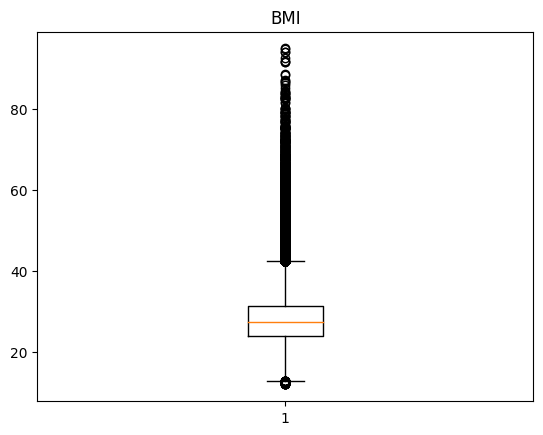

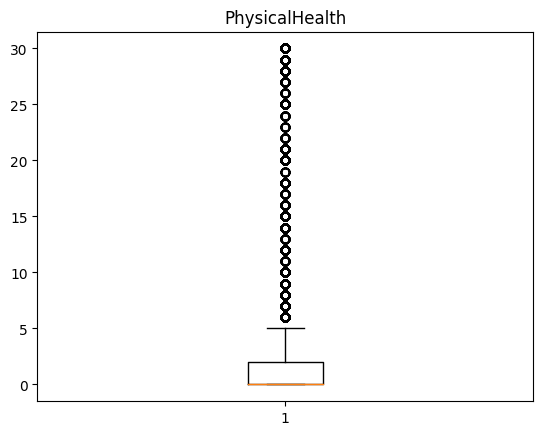

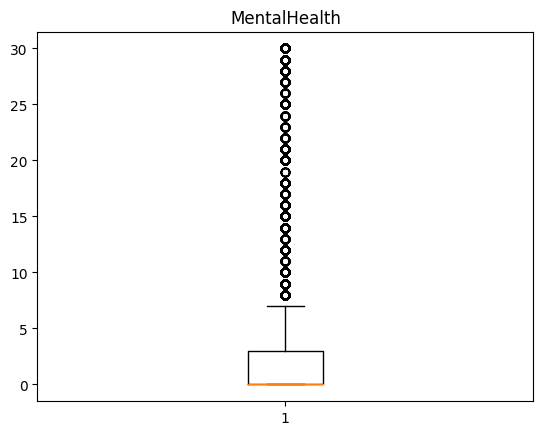

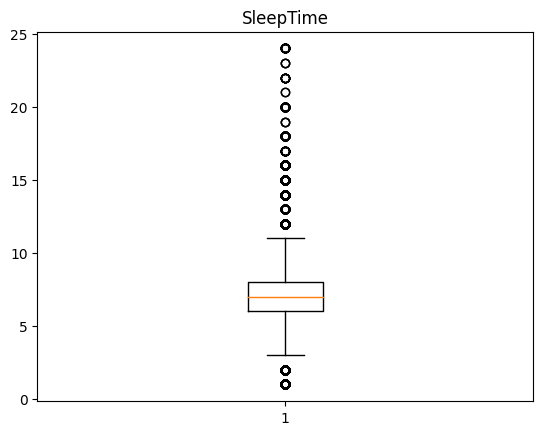

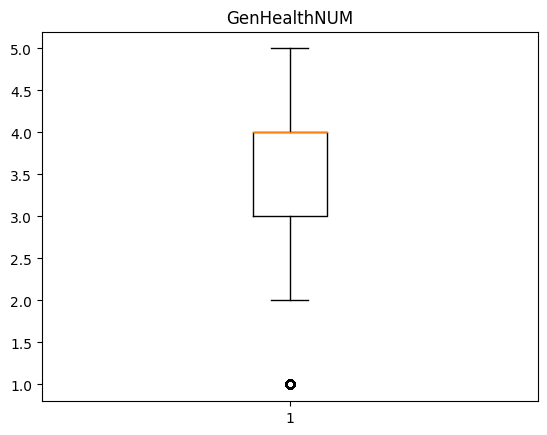

In [ ]:
# selecionando apenas as colunas numéricas e não binárias para realizar o boxplot
df_numeric = df.select_dtypes(include='number')

for coluna in df_numeric.columns:
    plt.boxplot(df_numeric[coluna])
    plt.title(coluna)
    plt.show()
  

## Visualização de dados (Fase 3)

## Avaliando possíveis gráficos de histograma

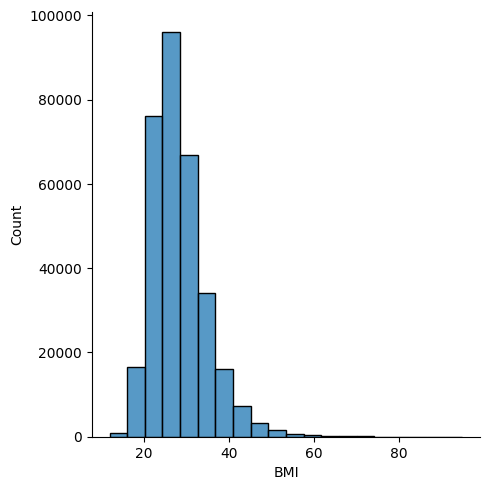

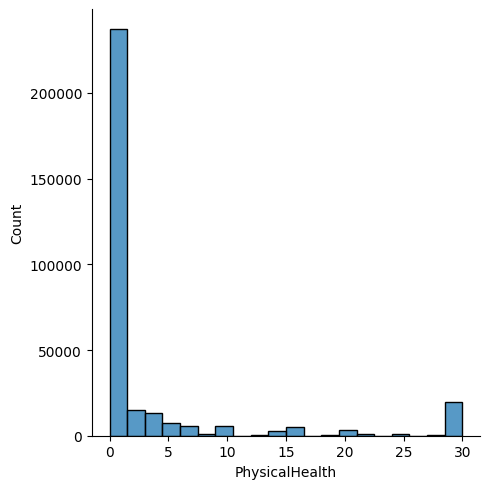

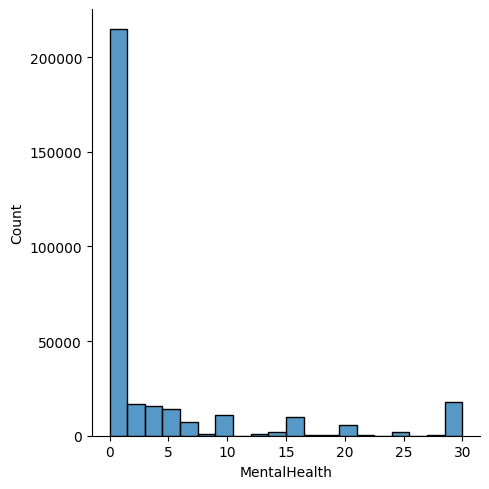

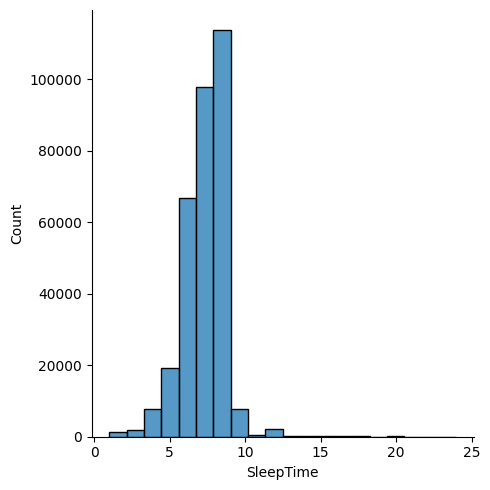

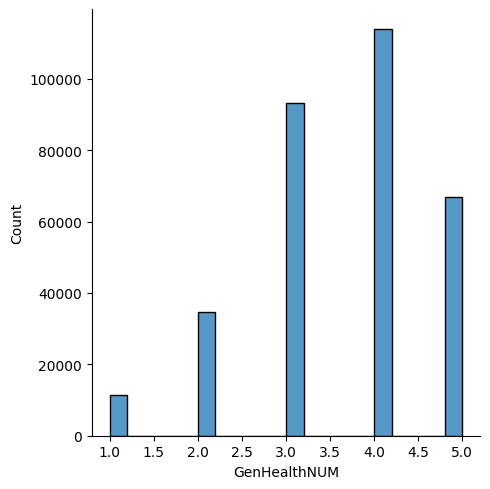

In [ ]:
for i in df_numeric:
  coluna = df_numeric[i]
  sns.displot(coluna, bins = 20)  
  plt.show()


## Gráficos

### Criando colunas numéricas

In [ ]:
# Criando novas colunas que contêm valores binários em formato numérico.

df['HeartDiseaseNUM'] = df['HeartDisease'].replace({"Yes": 1.0, "No": 0.0}) 
df['SmokingNUM'] = df['Smoking'].replace({"Yes": 1.0, "No": 0.0})
df['AlcoholDrinkingNUM'] = df['AlcoholDrinking'].replace({"Yes": 1.0, "No": 0.0})
df['StrokeNUM'] = df['Stroke'].replace({"Yes": 1.0, "No": 0.0}) 
df['DiffWalkingNUM'] = df['DiffWalking'].replace({"Yes": 1.0, "No": 0.0}) 
df['PhysicalActivityNUM'] = df['PhysicalActivity'].replace({"Yes": 1.0, "No": 0.0})
df['AsthmaNUM'] = df['Asthma'].replace({"Yes": 1.0, "No": 0.0})
df['KidneyDiseaseNUM'] = df['KidneyDisease'].replace({"Yes": 1.0, "No": 0.0})
df['SkinCancerNUM'] = df['SkinCancer'].replace({"Yes": 1.0, "No": 0.0})

# Arredondando valores da faixa de idade
df['AgeCategory'] = df['AgeCategory'].str.slice(stop=2).astype(int)

# A coluna "Diabetic" possui valores diferentes das outras, assumimos que  
#"No, borderline diabetes" vale 0.0 e "Yes (during pregnancy)" vale 1.0 

df['DiabeticNUM'] = df['Diabetic'].replace({"Yes": 1.0, "No": 0.0, "No, borderline diabetes": 0.0, "Yes (during pregnancy)": 1.0})

### Conhecendo as frequências dos dados (Histogramas)

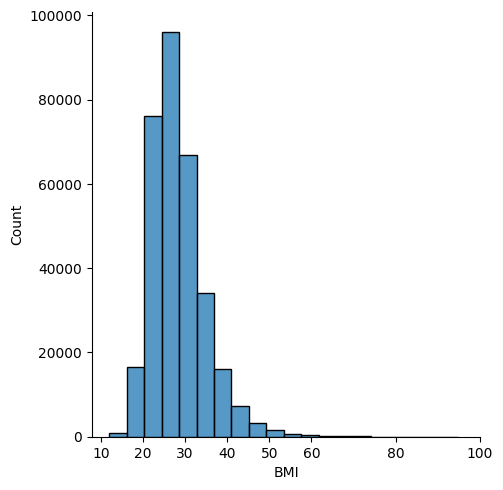

In [ ]:
# Índices de BMI (IMC)
sns.displot(df_numeric['BMI'], bins = 20)
plt.xticks([10, 20, 30, 40, 50, 60, 80, 100])
plt.show()

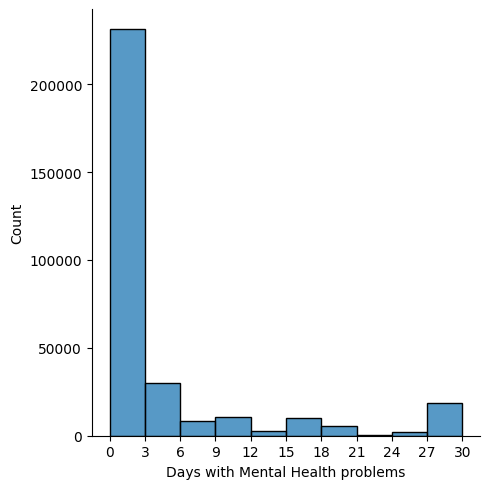

In [ ]:
# Dias com problemas de saúde mental
sns.displot(df_numeric['MentalHealth'], bins = 10)
plt.xlabel("Days with Mental Health problems")
plt.xticks(np.arange(0, 33, 3)) # define o xticks para 0 a 30 com step de 3.
plt.show()

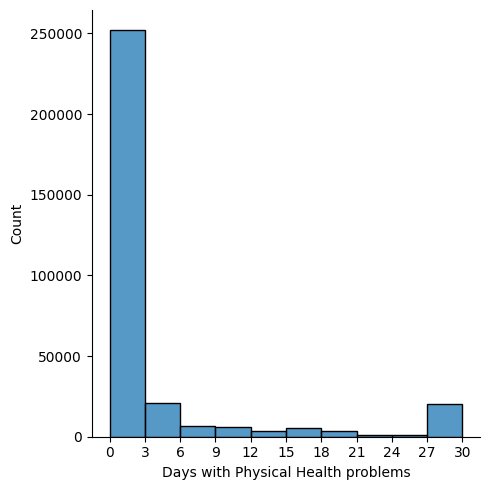

In [ ]:
# Dias com problemas físicos
sns.displot(df_numeric['PhysicalHealth'], bins = 10)
plt.xlabel("Days with Physical Health problems")
plt.xticks(np.arange(0, 33, 3)) # define o xticks para 0 a 30 com step de 3.
plt.show()

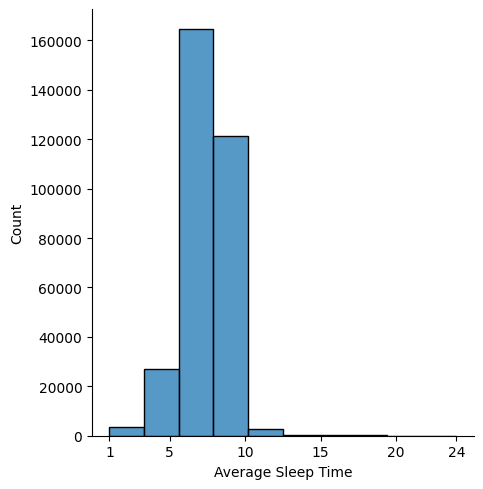

In [ ]:
# Média de horas dormidas
sns.displot(df_numeric['SleepTime'], bins = 10)
plt.xlabel("Average Sleep Time")
plt.xticks([1, 5, 10, 15, 20, 24])
plt.show()

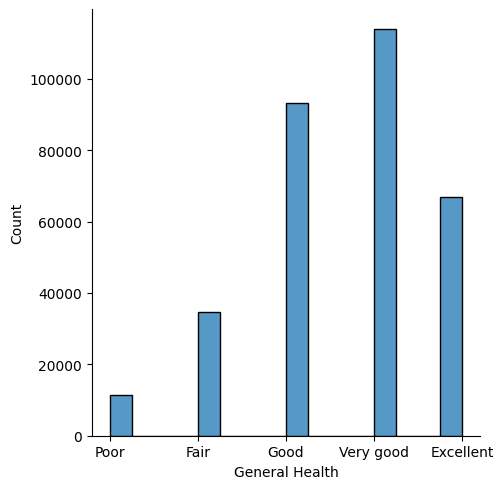

In [ ]:
# Saúde geral
sns.displot(df_numeric['GenHealthNUM'], binwidth = 0.25)

# Labels para 1, 2, 3, 4, 5, respectivamente
xtick_labels = ["Poor", "Fair", "Good", "Very good", "Excellent"] 
plt.xticks([1, 2, 3, 4, 5], xtick_labels)

plt.xlabel("General Health")
plt.show()

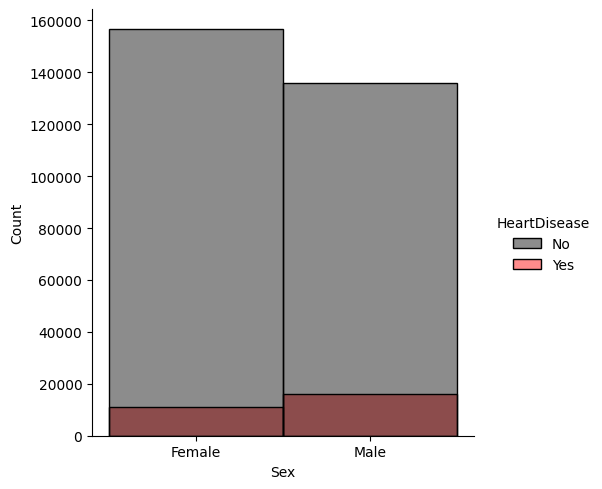

In [ ]:
# Relação de gênero e problemas no coração
sns.displot(data = df, x = "Sex", hue = 'HeartDisease', alpha = 0.45, palette = reversed("dark"))
plt.show()

O gráfico demonstra que existe uma desproporção entre os índices de problemáticos cardíacos e o sexo. É possível observar que mesmo com maior quantidade de mulheres na base de dados, os homens lideram na quantidade de pessoas com problemas cardíacos, podendo indicar uma possível relação do sexo.

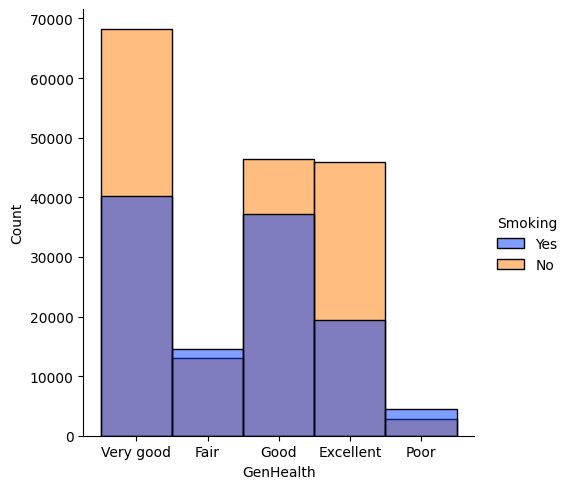

In [ ]:
# Relação de saúde geral com o ato de fumar (utlizando pessoas que não tiveram problemas no coração)

sns.displot(data = df.loc[df['HeartDisease'] == 'No'], x = "GenHealth", hue = 'Smoking', alpha = 0.5, palette = "bright")
plt.show()

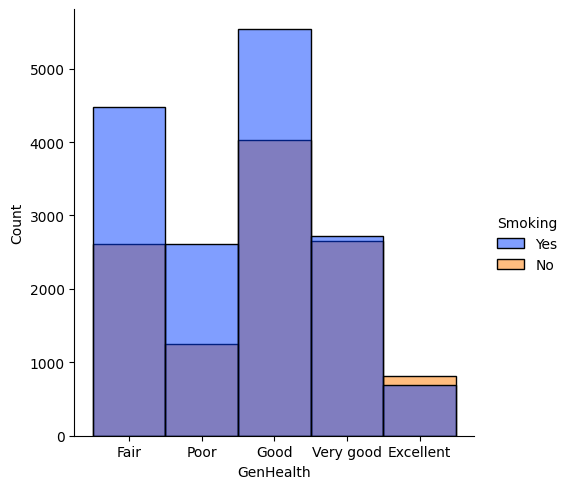

In [ ]:
# Relação de saúde geral com o ato de fumar (utlizando pessoas que tiveram problemas no coração)
sns.displot(data = df.loc[df['HeartDisease'] == 'Yes'], x = "GenHealth", hue = 'Smoking', alpha = 0.5, palette = "bright")
plt.show()

O gráfico demonstra que a proporção de fumantes em pessoas com saúde geral boa são bem menores quando comparada com saúde geral ruim, demonstrando que o ato de fumar pode ser bem impactante na saúde geral.

##Gráficos de linha / Barra

#### Relação SleepTime / Days with Mental / Physical problems

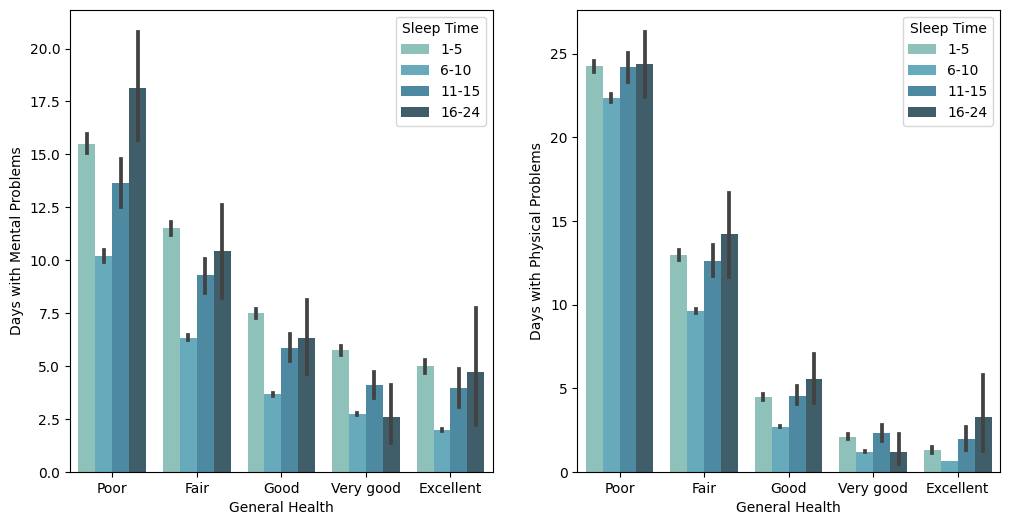

In [ ]:
# Categorizando os dados de SleepTime

bins = [1, 5, 10, 15, 24]
labels = ['1-5', '6-10', '11-15', '16-24']
df['SleepTimeCat'] = pd.cut(df['SleepTime'], bins=bins, labels=labels)

# Criando uma figura com dois eixos de plotagem
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 6))

# Plotando o primeiro gráfico no primeiro eixo de plotagem
sns.barplot(data=df, x="GenHealthNUM", y="MentalHealth", hue="SleepTimeCat", alpha=1, palette="GnBu_d", ax=ax1)
ax1.legend(title="Sleep Time")
ax1.set_xlabel("General Health")
ax1.set_ylabel("Days with Mental Problems")

ax1.set_xticks([0, 1, 2, 3, 4])
ax1.set_xticklabels(["Poor", "Fair", "Good", "Very good", "Excellent"])

# Plotando o segundo gráfico no segundo eixo de plotagem
sns.barplot(data=df, x="GenHealthNUM", y="PhysicalHealth", hue="SleepTimeCat", palette="GnBu_d", ax=ax2)
ax2.legend(title="Sleep Time")
ax2.set_xlabel("General Health")
ax2.set_ylabel("Days with Physical Problems")

ax2.set_xticks([0, 1, 2, 3, 4])
ax2.set_xticklabels(["Poor", "Fair", "Good", "Very good", "Excellent"])

plt.show()


Nesse comparativo de gráfico, é possível identificar que as pessoas que dormem entre 6 e 10 horas possuem menor incidência problemas físicos e mentais em todos os comparativos de General Health.
Além disso, é possível ver que os extremos de sono (muitas horas de sono e poucas horas) proporcionam um aumento nos índices de problemas físicos e mentais (ou vice-versa, ainda não é possível definir).


#### SleepTime / BMI

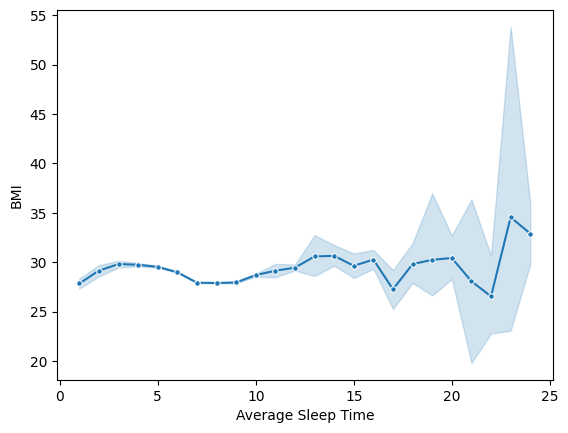

In [ ]:
sns.lineplot(data = df_numeric, x = "SleepTime", y = "BMI", marker='o', markersize = 4)
plt.xlabel("Average Sleep Time")
plt.show()

O gráfico demonstra que quanto maior o tempo dormido, maior a variação do BMI.
Também demonstrando que o período em torno de 7 e 9 horas é marcado por um BMI baixo e mais constante, também apresentando poucas dispersões.

#### MentalHealth / PhysicalHealth (Dias)

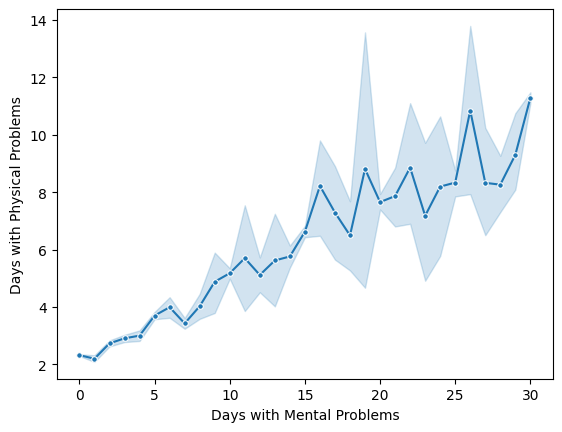

In [ ]:
sns.lineplot(data = df_numeric, x = "MentalHealth", y = "PhysicalHealth", marker = 'o', markersize = 4)
plt.xlabel("Days with Mental Problems")
plt.ylabel("Days with Physical Problems")
plt.show()

Aqui percebe-se uma relação entre os dias com problemas de saúde física e mental, quanto maior um, maior o outro.

#### GenHealth / Physical/Mental Health

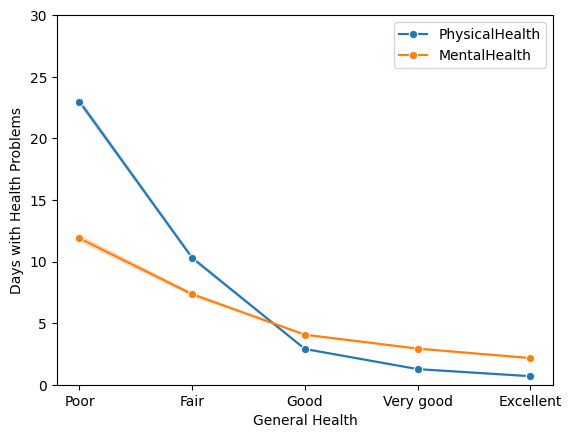

In [ ]:
sns.lineplot(data = df_numeric, x = "GenHealthNUM", y = "PhysicalHealth", label = 'PhysicalHealth', marker = 'o')
sns.lineplot(data = df_numeric, x = "GenHealthNUM", y = "MentalHealth", label = 'MentalHealth', marker = 'o')

plt.xticks([1, 2, 3, 4, 5], xtick_labels)

plt.ylabel("Days with Health Problems")
plt.xlabel("General Health")
plt.ylim([0, 30])

# define os ticks do eixo x (não tem valores 1.5, 2.5,...) 
# e os labels para 1, 2, 3, 4, 5 conforme os dados
plt.xticks([1, 2, 3, 4, 5], xtick_labels)
plt.show()

Pode-se perceber que quanto maior os dias com problemas de saúde, pior vai ser a saúde geral. Também percebe-se que a saúde física tem um maior impacto na saúde geral do que a mental, pois a curva para 'PhysicalHealth' é maior.

#### GenHealth / SleepTime

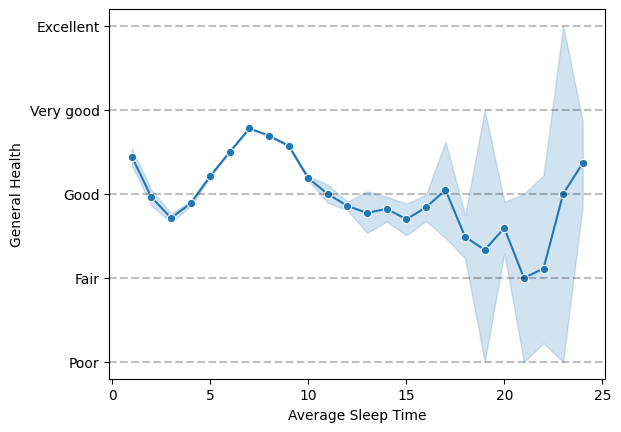

In [ ]:
sns.lineplot(data = df_numeric, x = "SleepTime", y = "GenHealthNUM", marker='o')

# define os ticks do eixo x (não tem valores 1.5, 2.5,...)
# e os labels para 1, 2, 3, 4, 5 conforme os dados
xtick_labels = ["Poor", "Fair", "Good", "Very good", "Excellent"]
plt.yticks([1, 2, 3, 4, 5], xtick_labels)

plt.ylabel("General Health")
plt.xlabel("Average Sleep Time")

# define as posições das linhas pontilhadas
for i in range(1, 6):
    plt.axhline(y=i, linestyle='--', color='black', alpha = 0.25)

plt.show()

As pessoas que dormem entre 5 e 10 horas por dia tem as melhores saúdes gerais. Mais especificamente, as que dormem 7 horas por dia, tem o melhor índice de saúde geral.

O gráfico demonstra a possível relação: As pessoas que não fazem atividade física regularmente têm períodos maiores de dias com problemas de saúde física.

In [ ]:
# Essa coluna possui valores diferentes das outras, assumimos que  
#"No, borderline diabetes" vale 0.0 e "Yes (during pregnancy)" vale 1.0 

df['DiabeticNUM'] = df['Diabetic'].replace({"Yes": 1.0, "No": 0.0, "No, borderline diabetes": 0.0, "Yes (during pregnancy)": 1.0})

#### PhysicalActivity / PhysicalHealth

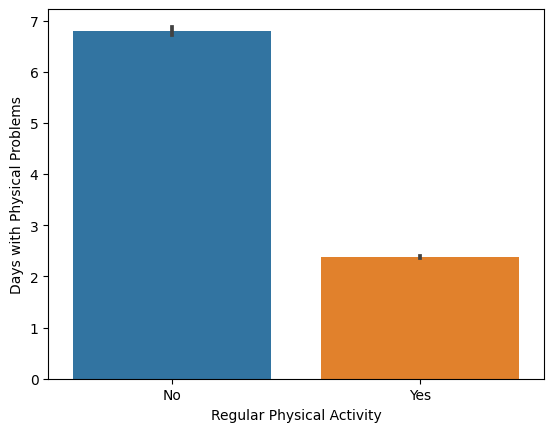

In [ ]:
sns.barplot(data = df, x = "PhysicalActivityNUM", y = "PhysicalHealth")

plt.xticks([0.0, 1.0],["No", "Yes"]) # Mostra 0 como 'No' e 1 como 'Yes'
plt.xlabel("Regular Physical Activity")
plt.ylabel("Days with Physical Problems")

plt.show()

### Gráficos de dispersão

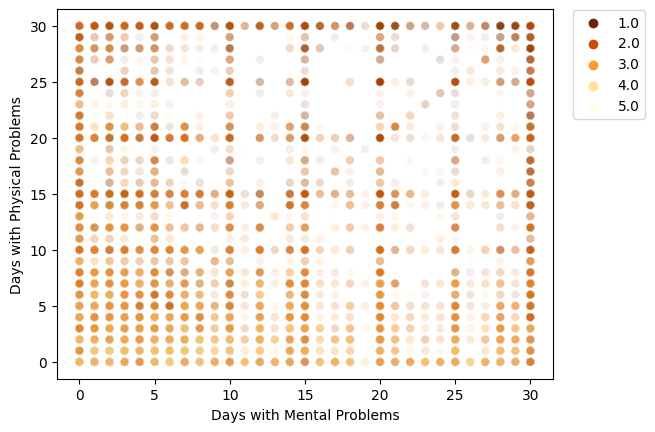

In [ ]:
sns.scatterplot(data = df, x = "MentalHealth", y = "PhysicalHealth", alpha = 0.08, hue = "GenHealthNUM", palette = "YlOrBr_r")
plt.legend(bbox_to_anchor = (1.2, 0.85), loc = 'right')
plt.xlabel("Days with Mental Problems")
plt.ylabel("Days with Physical Problems")
plt.show()



O gráfico mostra a relação de problemas de saúde física e saúde mental (dias)
a coloração do gráfico está de acordo com o General Health, indicando a saúde geral (1 = mais baixa, 5 = mais alta).

É possível perceber que a saúde física impacta mais na saúde geral, mas a saúde física e mental estão relacionadas entre si.

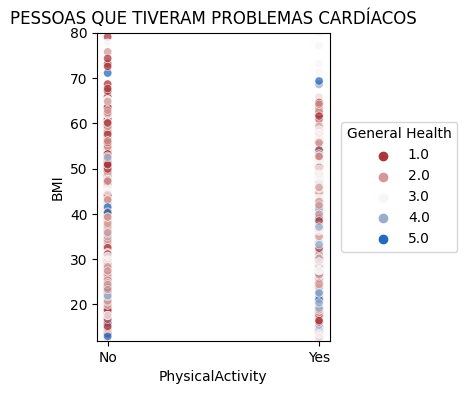

In [ ]:
sns.scatterplot(data=df.loc[df['HeartDisease'] == 'Yes'], x="PhysicalActivity", y="BMI", alpha=0.75, hue="GenHealthNUM", palette="vlag_r")

plt.ylim([12, 80]) # Segundo a OMS: 40 Obeso classe III
plt.legend(bbox_to_anchor=(1.3, 0.5), loc = 'center', title = 'General Health')
plt.gcf().set_size_inches(3, 4)

plt.title("PESSOAS QUE TIVERAM PROBLEMAS CARDÍACOS")
plt.show()

##Outros gráficos

Dentre os BMI's, as pessoas que não praticam atividade física regularmente e tiveram problema no coração têm as piores saúdes gerais.

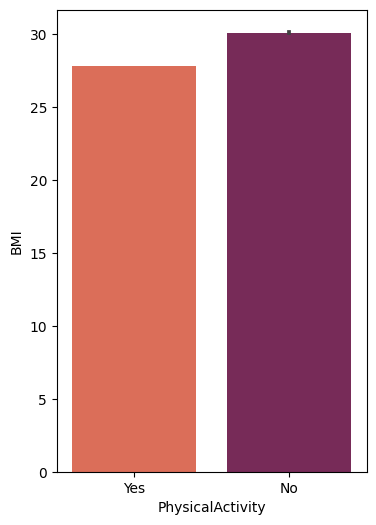

In [ ]:
sns.barplot(data = df, x = "PhysicalActivity", y = "BMI", palette = "rocket_r")
plt.gcf().set_size_inches(4, 6) # Define o tamanho da figura

plt.show()

O gráfico demonstra que existe uma possível relação: As pessoas que não praticam atividade física regularmente possuem maiores índices de BMI.








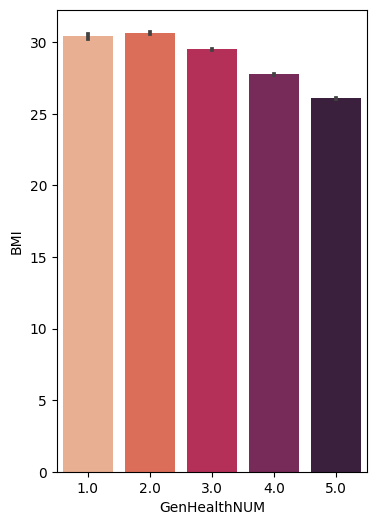

In [ ]:
sns.barplot(data = df_numeric, x = "GenHealthNUM", y = "BMI", palette = "rocket_r")
xtick_labels = ["Poor", "Fair", "Good", "Very good", "Excellent"]
plt.gcf().set_size_inches(4, 6) # Define o tamanho da figura

plt.show()

O gráfico mostra a relação entre o BMI e a saúde geral, demonstrando que pessoas com o BMI menor tende a possuir uma saúde geral melhor

In [ ]:
df_numeric = df.select_dtypes(include='number') # selecionando apenas as colunas numéricas

In [ ]:
def classifica_imc(valor_coluna):
  if valor_coluna < 18.5:
    valor_coluna = "Abaixo do Peso"
  elif valor_coluna < 25:
    valor_coluna = "Peso Ideal"
  elif valor_coluna < 30:
    valor_coluna = "Acima do Peso"
  elif valor_coluna < 35:
    valor_coluna = "Obesidade Grau I"
  elif valor_coluna < 40:
    valor_coluna = "Obesidade Grau II"
  else:
    valor_coluna = "Obesidade Grau III"
  return valor_coluna

def classifica_imc_num(valor_coluna):
  if valor_coluna < 18.5:
    valor_coluna = 1
  elif valor_coluna < 25:
    valor_coluna = 2
  elif valor_coluna < 30:
    valor_coluna = 3
  elif valor_coluna < 35:
    valor_coluna = 4
  elif valor_coluna < 40:
    valor_coluna = 5
  else:
    valor_coluna = 6
  return valor_coluna

df["BMI_Classification"] = df["BMI"].apply(classifica_imc)
df["BMI_Classification_num"] = df["BMI"].apply(classifica_imc_num)

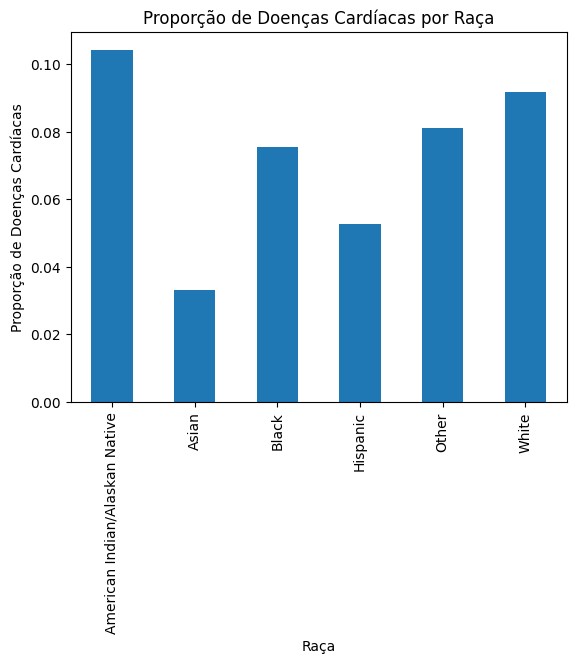

In [ ]:
proporcao = df.groupby('Race')['HeartDiseaseNUM'].mean()
proporcao.plot(kind='bar')
plt.xlabel('Raça')
plt.ylabel('Proporção de Doenças Cardíacas')
plt.title('Proporção de Doenças Cardíacas por Raça')
plt.show()

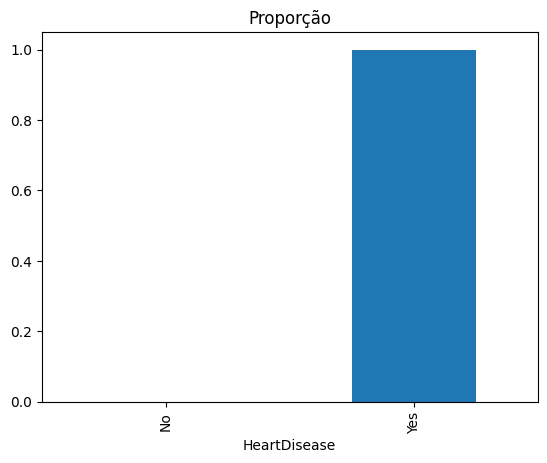

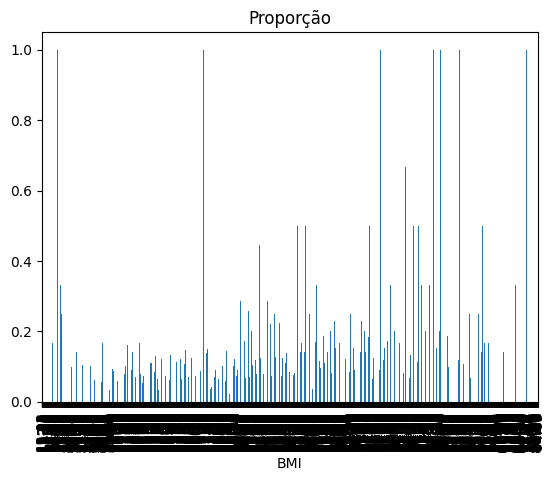

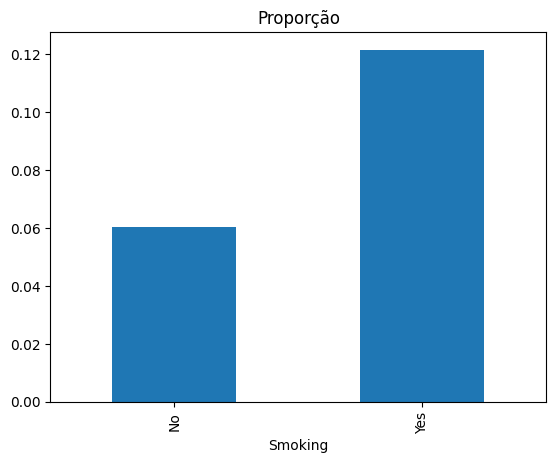

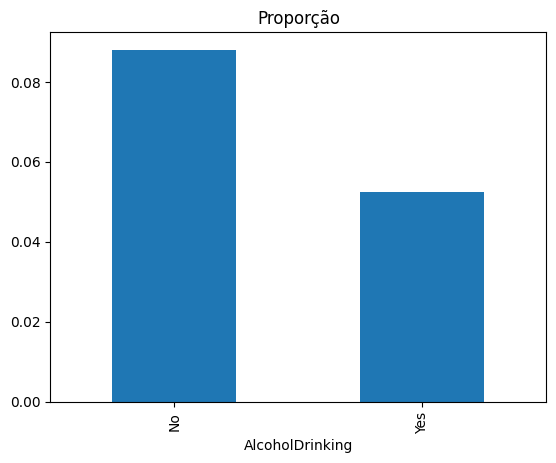

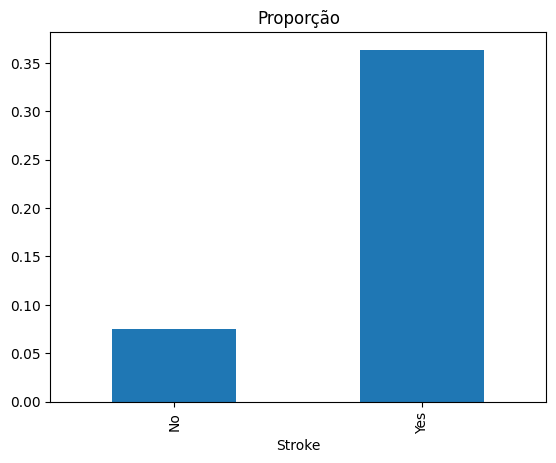

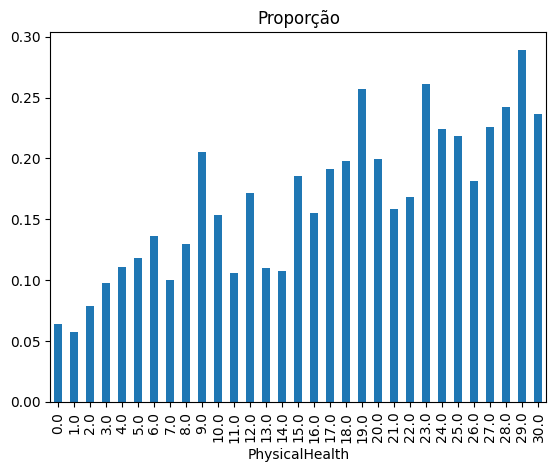

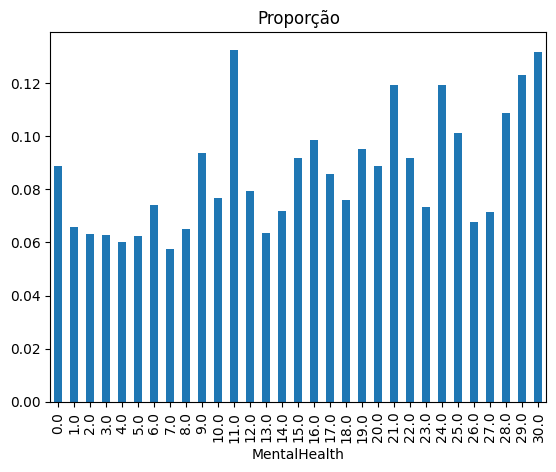

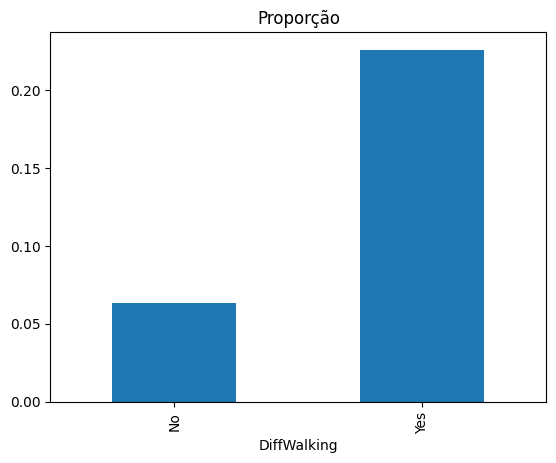

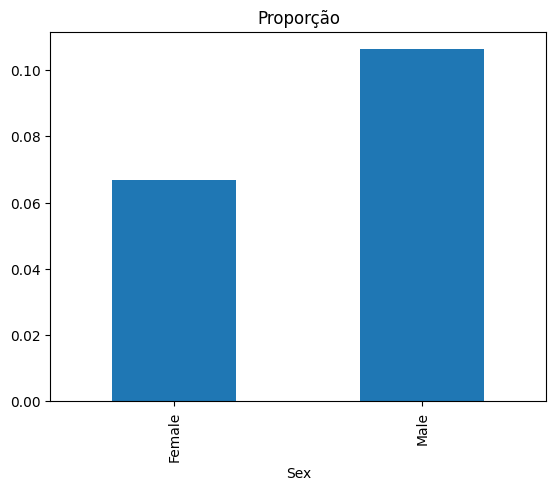

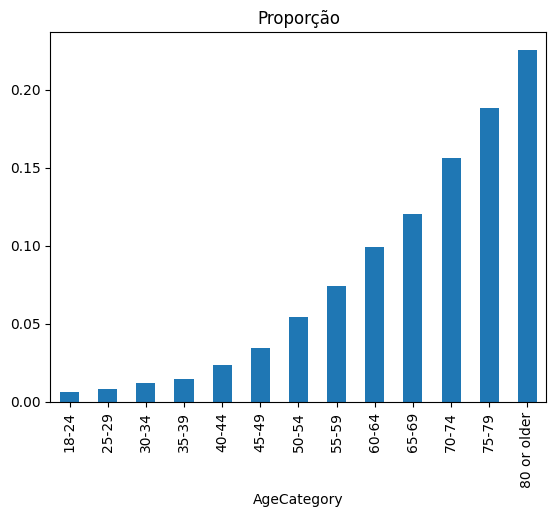

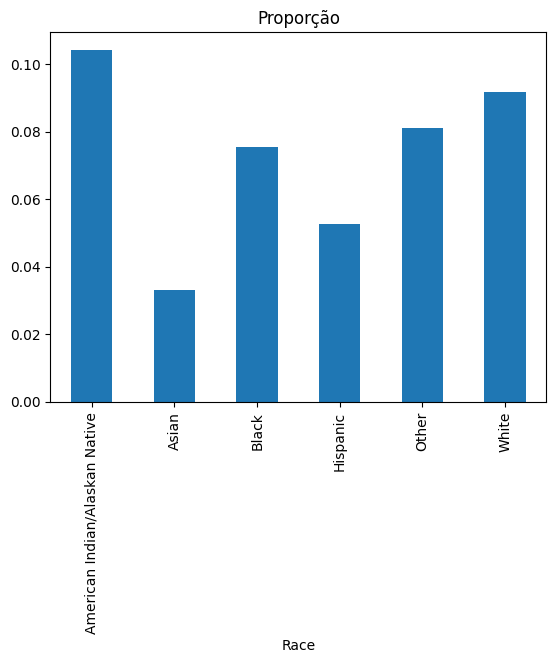

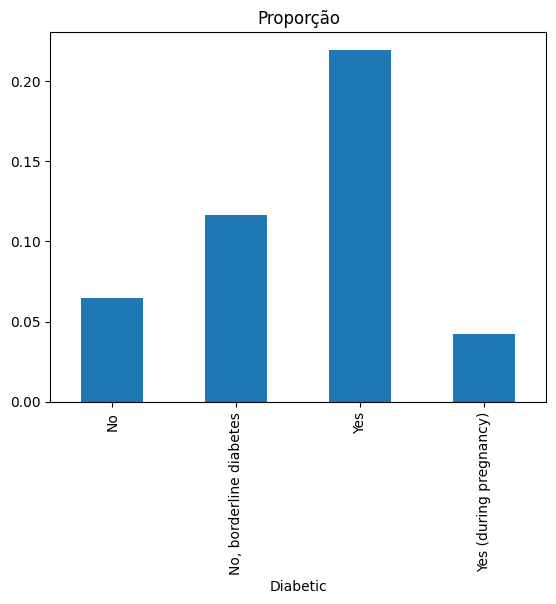

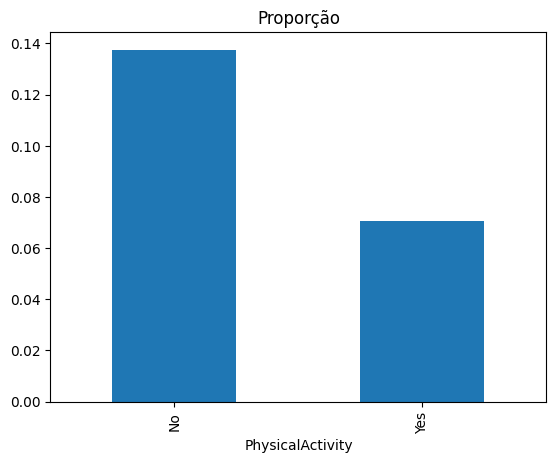

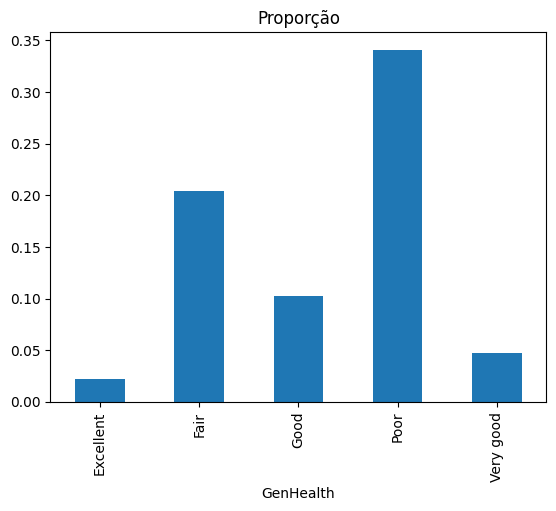

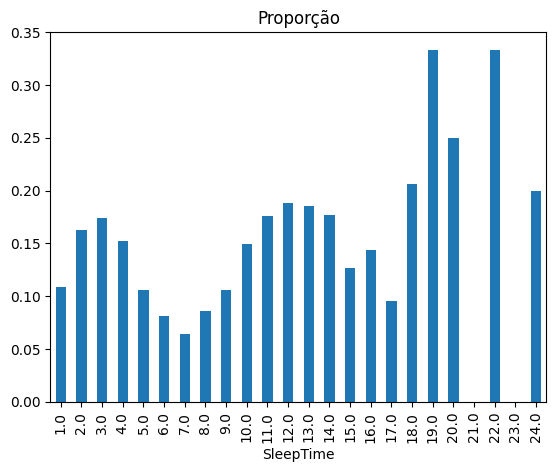

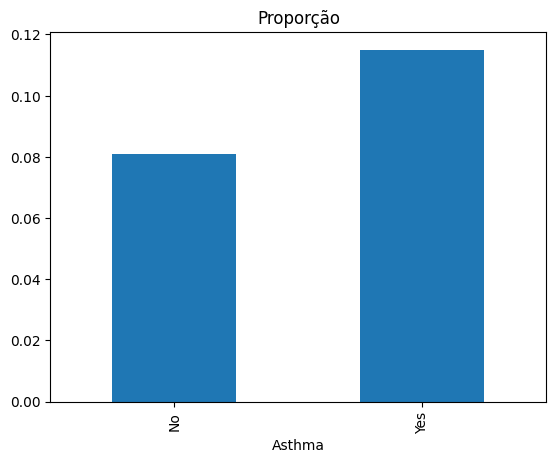

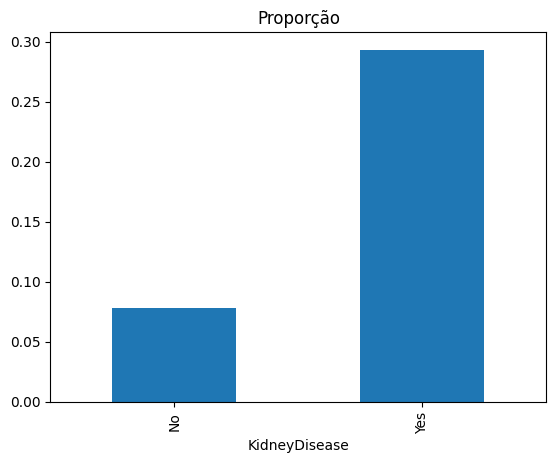

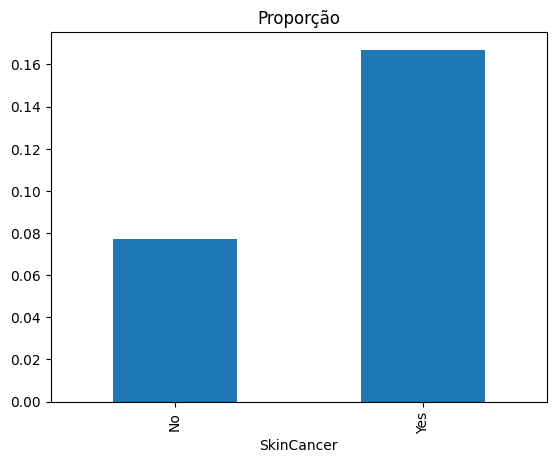

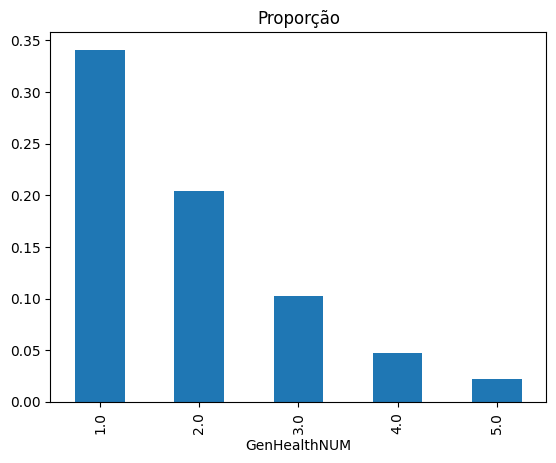

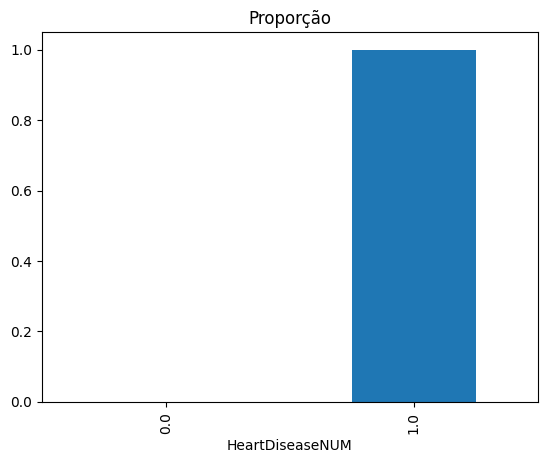

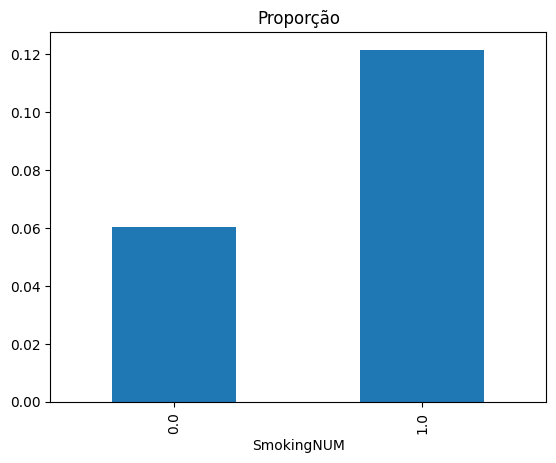

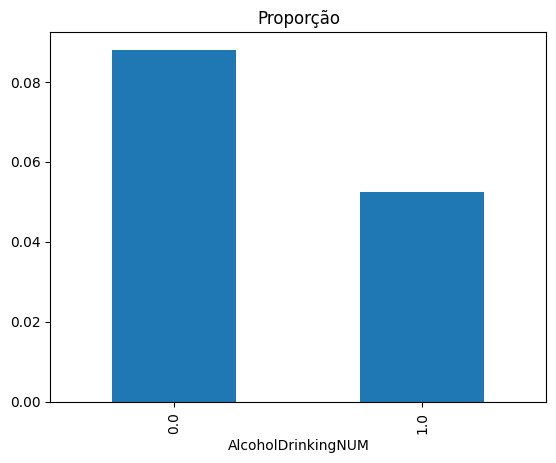

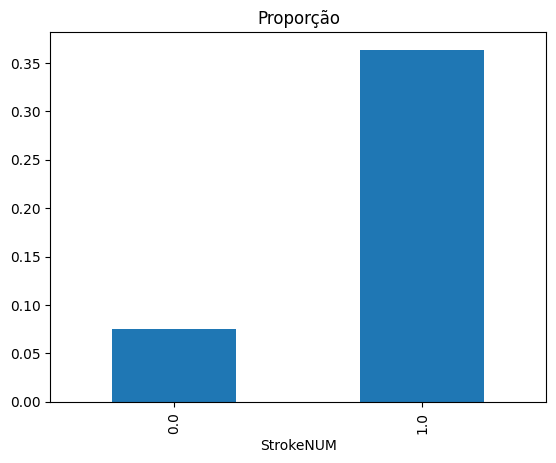

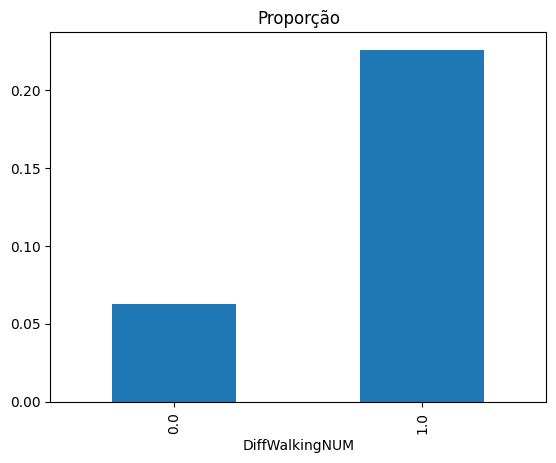

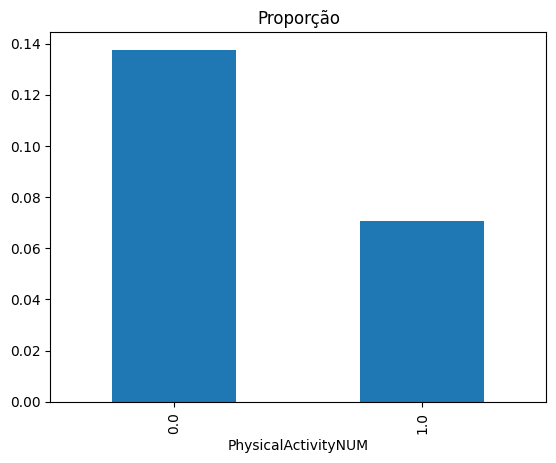

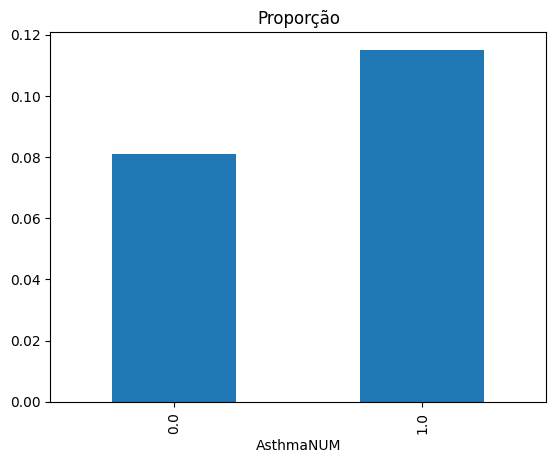

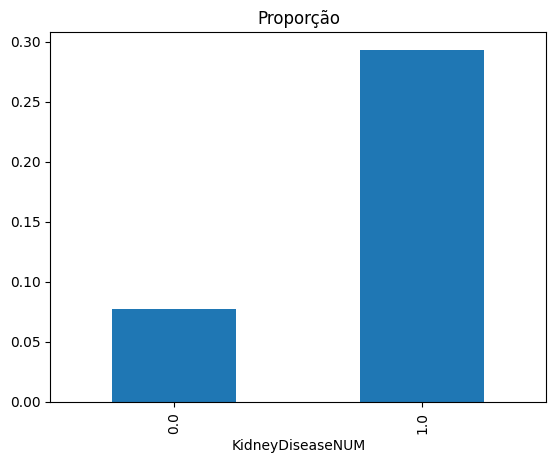

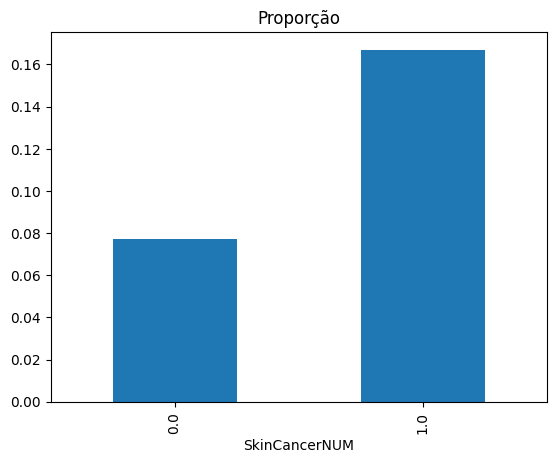

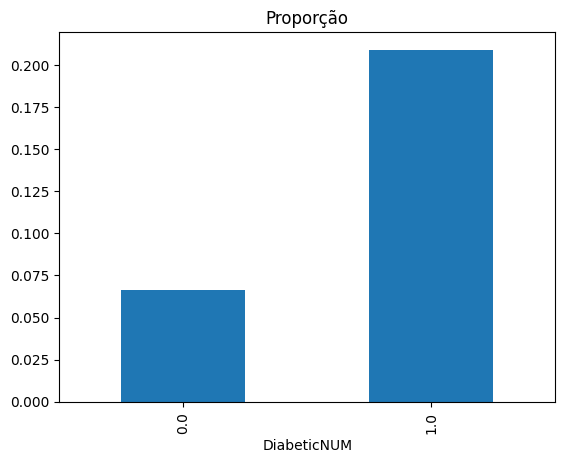

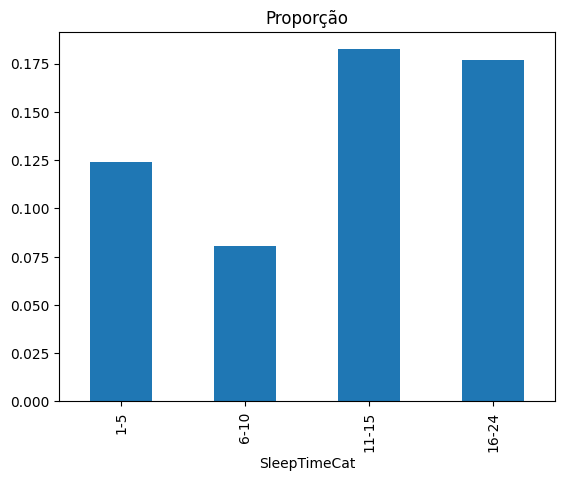

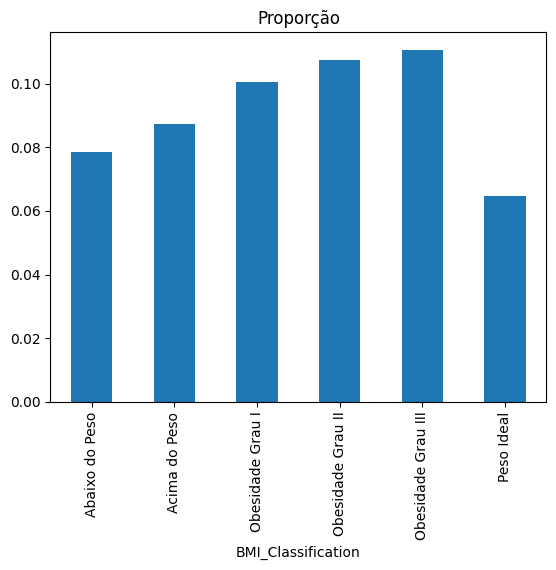

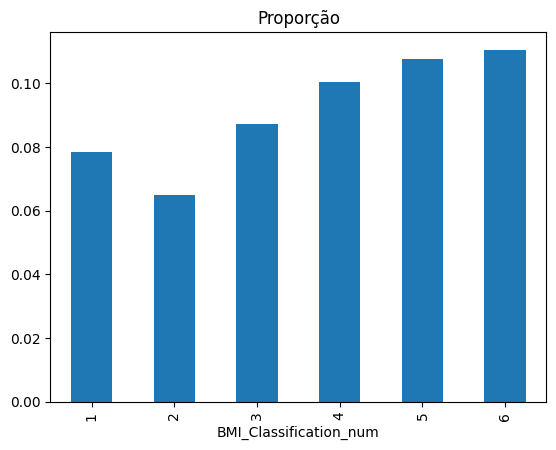

In [ ]:
for i in df:
  proporcao2 = df.groupby(i)['HeartDiseaseNUM'].mean()
  proporcao2.plot(kind='bar')
  plt.title('Proporção')
  plt.show()



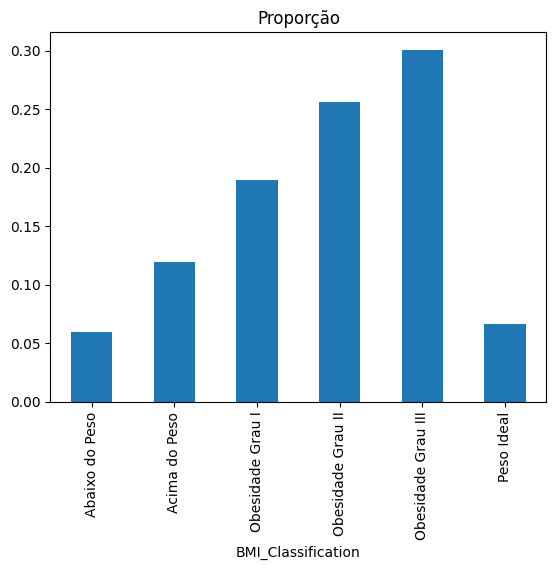

In [ ]:
proporcao2 = df.groupby('BMI_Classification')['DiabeticNUM'].mean()
proporcao2.plot(kind='bar')
plt.title('Proporção')
plt.show()

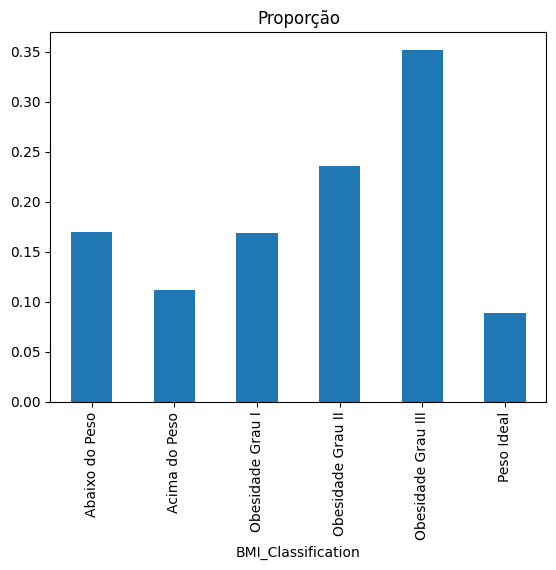

In [ ]:
proporcao2 = df.groupby('BMI_Classification')['DiffWalkingNUM'].mean()
proporcao2.plot(kind='bar')
plt.title('Proporção')
plt.show()

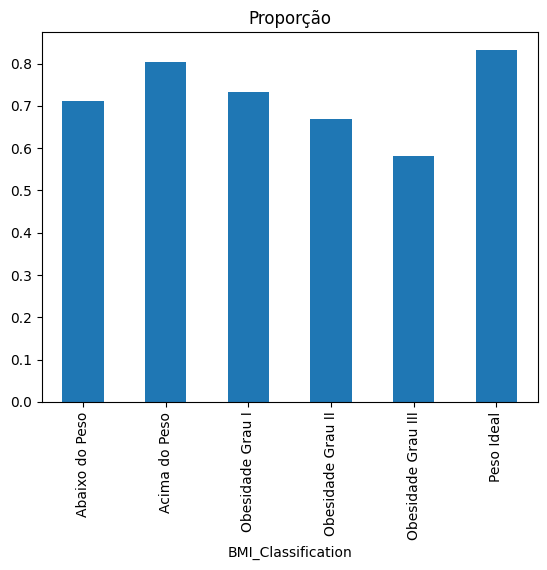

In [ ]:
proporcao2 = df.groupby('BMI_Classification')['PhysicalActivityNUM'].mean()
proporcao2.plot(kind='bar')
plt.title('Proporção')
plt.show()

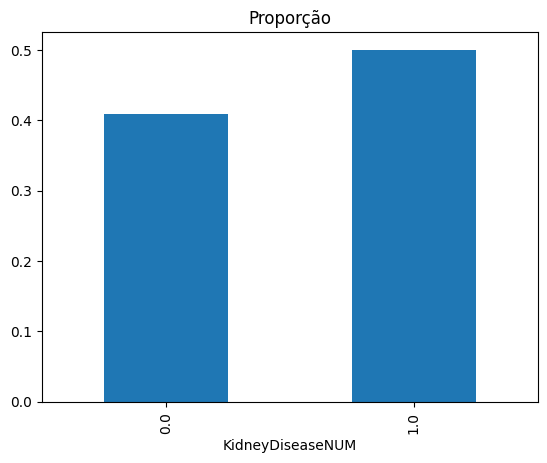

In [ ]:
proporcao2 = df.groupby('KidneyDiseaseNUM')['SmokingNUM'].mean()
proporcao2.plot(kind='bar')
plt.title('Proporção')
plt.show()

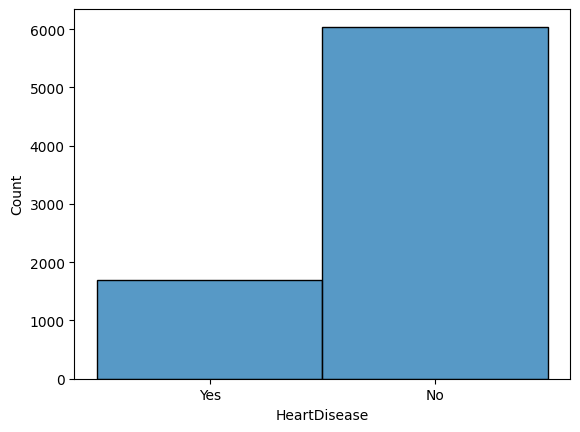

In [ ]:
df_novo = df[(df['Smoking'] == 'Yes') &
             (df['AlcoholDrinking'] == 'No') &
             (df['PhysicalActivity'] == 'No') &
             ((df['SleepTime'] < 6) |
             (df['SleepTime'] > 9))]

sns.histplot(data = df_novo, x = 'HeartDisease')
plt.show()

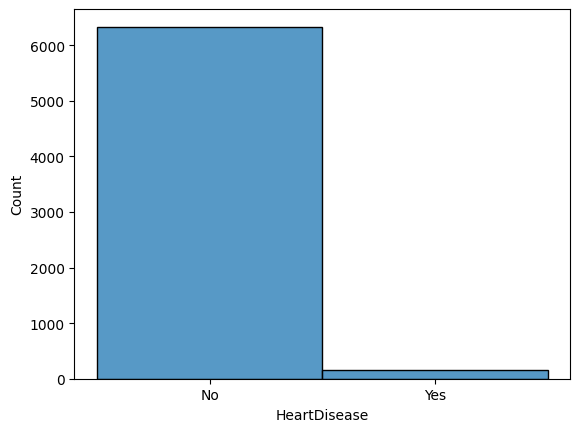

In [ ]:
df_novo2 = df[(df['Smoking'] == 'No') &
             (df['AlcoholDrinking'] == 'Yes') &
             (df['PhysicalActivity'] == 'Yes') &
             (df['SleepTime'] >= 6) &
             (df['SleepTime'] <= 9)]
             
sns.histplot(data = df_novo2, x = 'HeartDisease')
plt.show()

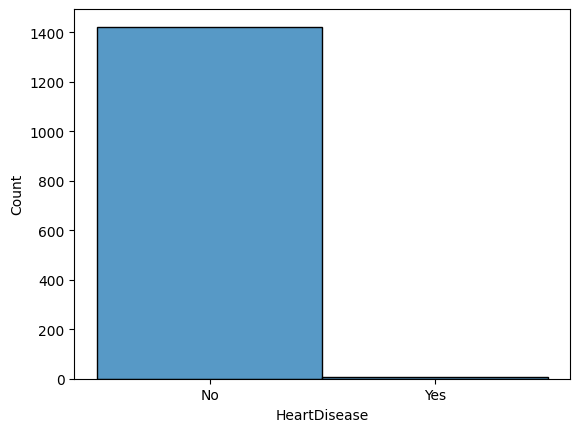

In [ ]:
df_novo3 = df[(df['Smoking'] == 'No') &
             (df['AlcoholDrinking'] == 'Yes') &
             (df['PhysicalHealth'] <= 5) &
             (df['PhysicalActivity'] == 'Yes') &
             (df['SleepTime'] >= 6) &
             (df['SleepTime'] <= 9) &
             (df['Stroke'] == 'No') &
             (df['DiffWalking'] == 'No') &
             (df['Sex'] == 'Female') &
             (df['DiabeticNUM'] == 0) &
             (df['GenHealthNUM'] >= 3) &
             (df['Asthma'] == 'No') & 
             (df['KidneyDisease'] == 'No') &
             (df['SkinCancer'] == 'No') &
             (df['BMI_Classification_num'] < 3)]
             
sns.histplot(data = df_novo3, x = 'HeartDisease')
plt.show()

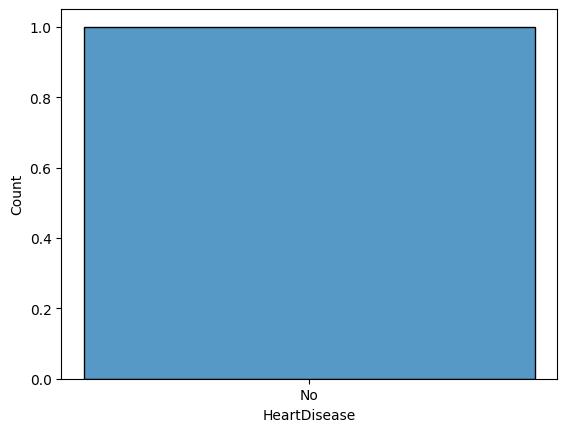

In [ ]:
df_novo4 = df[(df['Smoking'] == 'Yes') &
             (df['AlcoholDrinking'] == 'No') &
             (df['PhysicalHealth'] > 5) &
             (df['PhysicalActivity'] == 'No') &
             ((df['SleepTime'] < 6) |
             (df['SleepTime'] > 9)) &
             (df['Stroke'] == 'Yes') &
             (df['DiffWalking'] == 'Yes') &
             (df['Sex'] == 'Male') &
             (df['DiabeticNUM'] == 1) &
             (df['GenHealthNUM'] < 3) &
             (df['Asthma'] == 'Yes') & 
             (df['KidneyDisease'] == 'Yes') &
             (df['SkinCancer'] == 'Yes') &
             (df['BMI_Classification_num'] > 3)]

sns.histplot(data = df_novo4, x = 'HeartDisease')
plt.show()

<Axes: xlabel='Sex', ylabel='Count'>

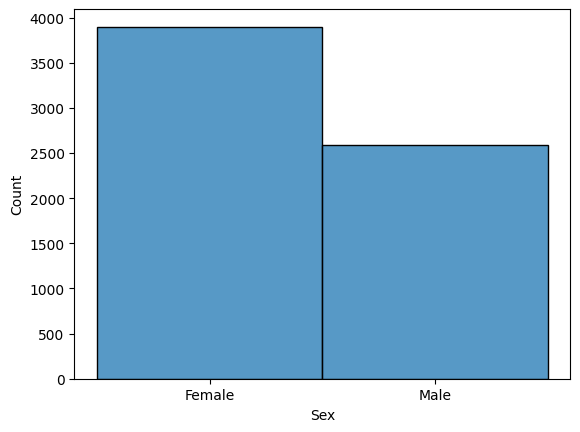

In [ ]:
df_novo5 = df[(df['Smoking'] == 'No') &
             (df['AlcoholDrinking'] == 'Yes') &
             (df['PhysicalActivity'] == 'Yes') &
             (df['SleepTime'] >= 6) &
             (df['SleepTime'] <= 9)]

sns.histplot(data = df_novo5, x = 'Sex')

<Axes: xlabel='Sex', ylabel='Count'>

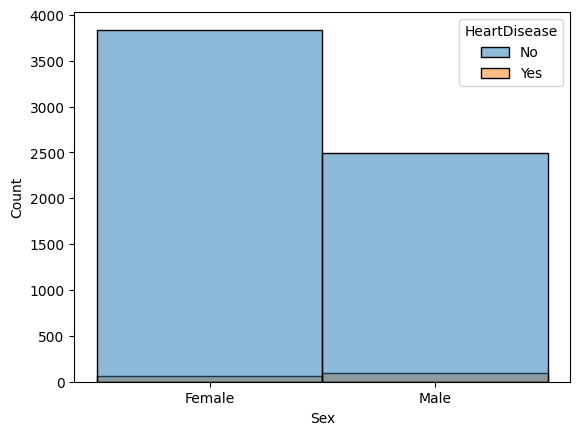

In [ ]:
df_novo5 = df[(df['Smoking'] == 'No') &
             (df['AlcoholDrinking'] == 'Yes') &
             (df['PhysicalActivity'] == 'Yes') &
             (df['SleepTime'] >= 6) &
             (df['SleepTime'] <= 9)]

sns.histplot(data = df_novo5, x = 'Sex', hue = 'HeartDisease')

<Axes: xlabel='Sex', ylabel='Count'>

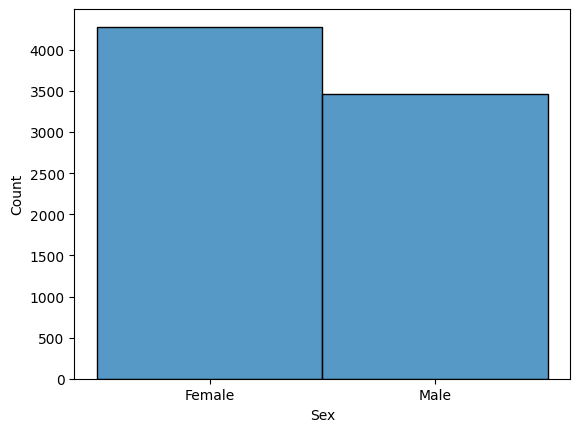

In [ ]:
df_novo6 = df[(df['Smoking'] == 'Yes') &
             (df['AlcoholDrinking'] == 'No') &
             (df['PhysicalActivity'] == 'No') &
             ((df['SleepTime'] < 6) |
             (df['SleepTime'] > 9))]

sns.histplot(data = df_novo6, x = 'Sex')

<Axes: xlabel='Sex', ylabel='Count'>

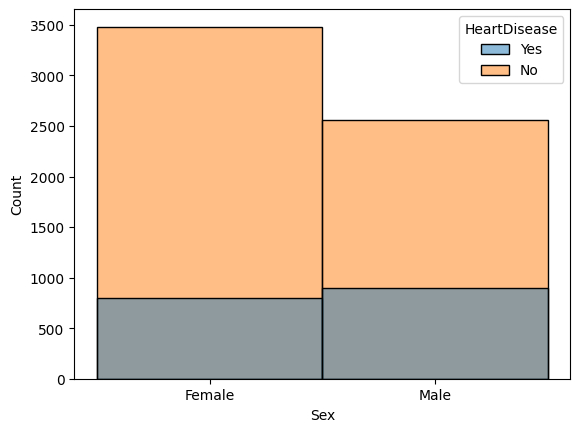

In [ ]:
df_novo6 = df[(df['Smoking'] == 'Yes') &
             (df['AlcoholDrinking'] == 'No') &
             (df['PhysicalActivity'] == 'No') &
             ((df['SleepTime'] < 6) |
             (df['SleepTime'] > 9))]

sns.histplot(data = df_novo6, x = 'Sex', hue = 'HeartDisease')

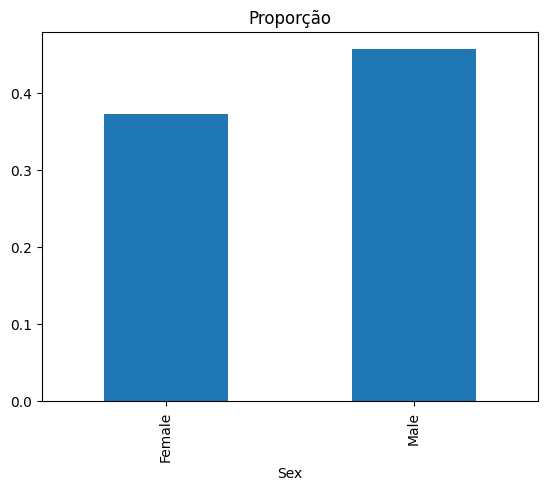

In [ ]:
proporcao = df.groupby('Sex')['SmokingNUM'].mean()
proporcao.plot(kind='bar')
plt.title('Proporção')
plt.show()

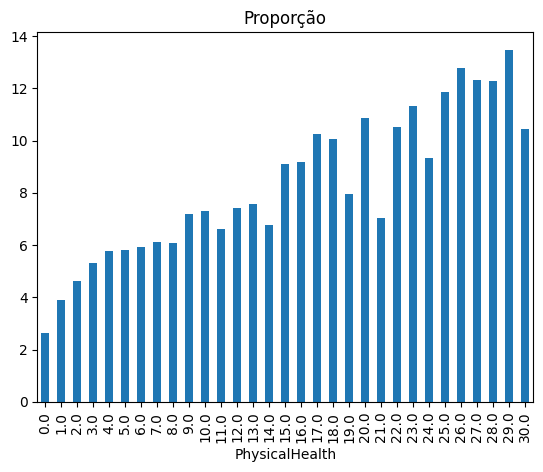

In [ ]:
proporcao = df.groupby('PhysicalHealth')['MentalHealth'].mean()
proporcao.plot(kind='bar')
plt.title('Proporção')
plt.show()

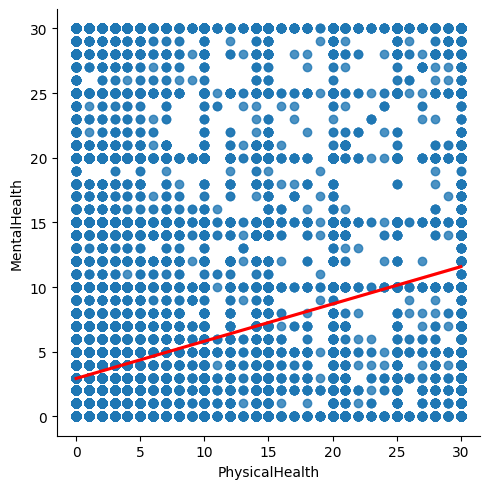

In [ ]:
sns.lmplot(data = df, x = 'PhysicalHealth', y = 'MentalHealth', line_kws={'color': 'red'})
